In [3]:
from lazylib import make, GoogleLeNetEE, device, takeConfusionMatrix, takeRocCurve, now, register, takeFromDisk
import torch

In [4]:
n = now()
epocs = 100
model = make(
    EPOCHS=epocs, 
    BATCH_SIZE=128, 
    LEARNING_RATE=1e-3, 
    csv_path="/home/luizp/projects/pibit/src/data/processed/csv/nslClean.csv", 
    out_path=f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}',
    MODEL=GoogleLeNetEE(x=128).to(device()), 
    SEED=1701,
    xcol=2
    ) 
torch.save(model.state_dict(), f"/home/luizp/projects/pibit/src/0utput/models/{n}_alexnet_{epocs}.nnModel")

[29-07-2024 18-41-39] Epoch 001 Acc: 0.5030 Loss: 0.96705034: 100%|██████████| 99/99 [00:18<00:00,  5.27it/s]
[29-07-2024 18-42-18] Epoch 001 Val. Acc: 0.5350 Val. Loss: 0.69121805: 100%|██████████| 886/886 [00:39<00:00, 22.68it/s]
[29-07-2024 18-42-39] Epoch 002 Acc: 0.5603 Loss: 0.64588845: 100%|██████████| 99/99 [00:18<00:00,  5.24it/s]
[29-07-2024 18-43-19] Epoch 002 Val. Acc: 0.9466 Val. Loss: 0.18955511: 100%|██████████| 886/886 [00:40<00:00, 21.96it/s]
[29-07-2024 18-43-40] Epoch 003 Acc: 0.9607 Loss: 0.11805324: 100%|██████████| 99/99 [00:19<00:00,  5.10it/s]
[29-07-2024 18-44-22] Epoch 003 Val. Acc: 0.9739 Val. Loss: 0.07793071: 100%|██████████| 886/886 [00:41<00:00, 21.56it/s]
[29-07-2024 18-44-43] Epoch 004 Acc: 0.9713 Loss: 0.08661376: 100%|██████████| 99/99 [00:19<00:00,  5.01it/s]
[29-07-2024 18-45-26] Epoch 004 Val. Acc: 0.9707 Val. Loss: 0.10442194: 100%|██████████| 886/886 [00:41<00:00, 21.11it/s]
[29-07-2024 18-45-47] Epoch 005 Acc: 0.9773 Loss: 0.06628378: 100%|█████

Finished experiment!


In [9]:
train = takeFromDisk(f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}-train--{epocs}.txt')
valid = takeFromDisk(f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}-valid--{epocs}.txt')

In [10]:
import numpy as np
from sklearn.metrics import auc, roc_curve, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

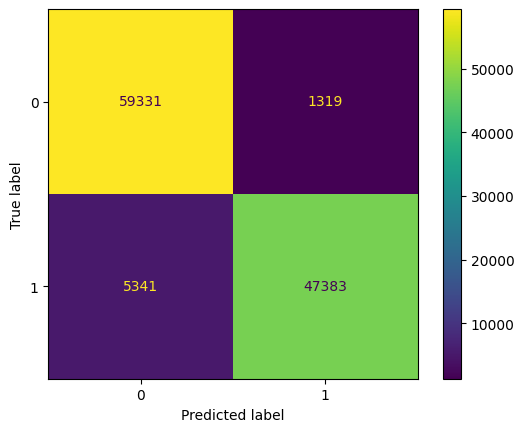

In [11]:
ConfusionMatrixDisplay(np.array(valid[0]['confusion_matrix'])).plot()

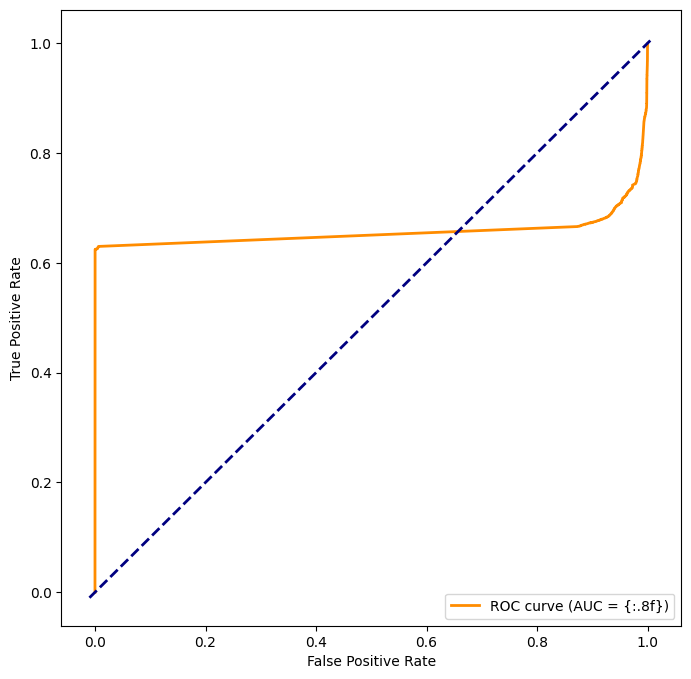

In [8]:
takeRocCurve(valid)